In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.neighbors import KernelDensity

In [3]:
cabspotting = pd.read_pickle('../data_cabspotting/cabspotting_cut.pkl')
geolife = pd.read_pickle('../data_geolife/geolife_cut.pkl')
mdc = pd.read_pickle('../data_mdc/mdc_cut.pkl')
tdrive = pd.read_pickle('../data_t-drive/t-drive_cut.pkl')

In [4]:
cabspotting = pd.DataFrame({'first': cabspotting.reset_index().groupby('user')['time'].min(),
                            'last': cabspotting.reset_index().groupby('user')['time'].max()})
geolife = pd.DataFrame({'first': geolife.reset_index().groupby('user')['time'].min(),
                        'last': geolife.reset_index().groupby('user')['time'].max()})
mdc = pd.DataFrame({'first': mdc.reset_index().groupby('user')['time'].min(),
                    'last': mdc.reset_index().groupby('user')['time'].max()})
tdrive = pd.DataFrame({'first': tdrive.reset_index().groupby('user')['time'].min(),
                       'last': tdrive.reset_index().groupby('user')['time'].max()})

In [5]:
grid = np.arange(0.0, 1.0, 0.005).reshape([-1, 1])

## Cabspotting

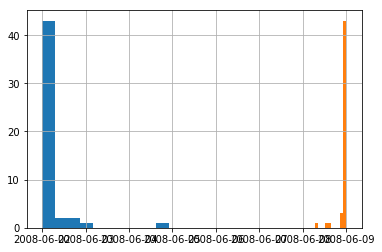

In [5]:
cabspotting['first'].hist()
cabspotting['last'].hist()

In [6]:
seconds_since = (cabspotting['first'] - cabspotting['first'].min()).dt.total_seconds()
seconds_until = (cabspotting['last'] - cabspotting['first'].min()).dt.total_seconds()

seconds_total = (cabspotting['last'].max() - cabspotting['first'].min()).total_seconds()

cabspotting['rel_start'] = seconds_since / seconds_total
cabspotting['rel_end'] = seconds_until / seconds_total

cabspotting['rel_duration'] = cabspotting['rel_end'] - cabspotting['rel_start']

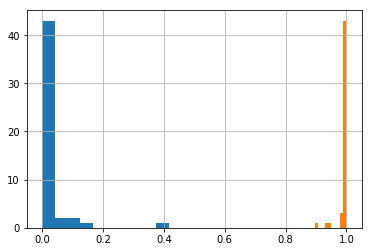

In [7]:
cabspotting['rel_start'].hist()
cabspotting['rel_end'].hist()

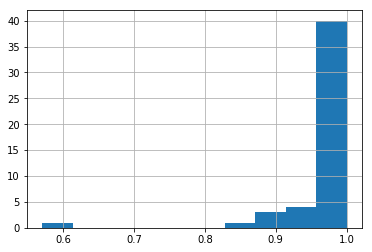

In [8]:
cabspotting['rel_duration'].hist()

In [9]:
kde_cabspotting_starts = KernelDensity(bandwidth=0.03)
kde_cabspotting_starts.fit(cabspotting['rel_start'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [10]:
kde_cabspotting_ends = KernelDensity(bandwidth=0.03)
kde_cabspotting_ends.fit(cabspotting['rel_end'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [11]:
kde_cabspotting_durations = KernelDensity(bandwidth=0.03)
kde_cabspotting_durations.fit(cabspotting['rel_duration'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

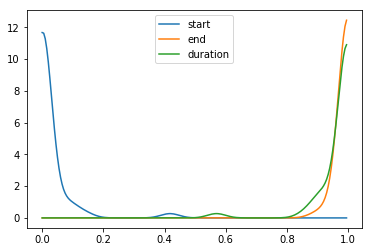

In [12]:
plt.plot(grid, np.exp(kde_cabspotting_starts.score_samples(grid)), label='start')
plt.plot(grid, np.exp(kde_cabspotting_ends.score_samples(grid)), label='end')
plt.plot(grid, np.exp(kde_cabspotting_durations.score_samples(grid)), label='duration')
plt.legend()
plt.show()

In [13]:
sekde_cabspotting = {'kde_start': kde_cabspotting_starts,
                     'kde_end': kde_cabspotting_ends,
                     'kde_duration': kde_cabspotting_durations}

In [14]:
pickle.dump(sekde_cabspotting, open('../data_cabspotting/sekde_cabspotting_cut_003.pkl', 'wb'))

## GeoLife

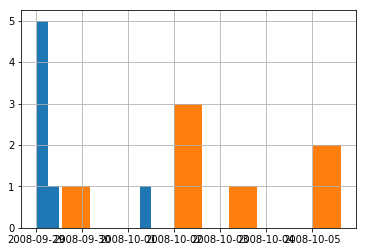

In [15]:
geolife['first'].hist()
geolife['last'].hist()

In [19]:
seconds_since = (geolife['first'] - geolife['first'].min()).dt.total_seconds()
seconds_until = (geolife['last'] - geolife['first'].min()).dt.total_seconds()

seconds_total = (geolife['last'].max() - geolife['first'].min()).total_seconds()

geolife['rel_start'] = seconds_since / seconds_total
geolife['rel_end'] = seconds_until / seconds_total

geolife['rel_duration'] = geolife['rel_end'] - geolife['rel_start']

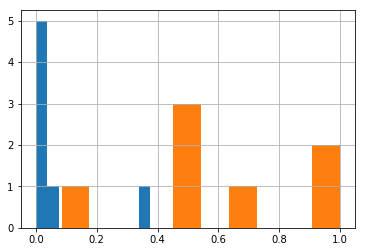

In [20]:
geolife['rel_start'].hist()
geolife['rel_end'].hist()

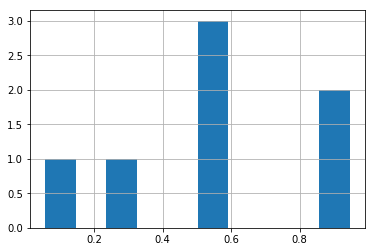

In [21]:
geolife['rel_duration'].hist()

In [22]:
kde_geolife_starts = KernelDensity(bandwidth=0.03)
kde_geolife_starts.fit(geolife['rel_start'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [23]:
kde_geolife_ends = KernelDensity(bandwidth=0.03)
kde_geolife_ends.fit(geolife['rel_end'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [24]:
kde_geolife_durations = KernelDensity(bandwidth=0.03)
kde_geolife_durations.fit(geolife['rel_duration'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

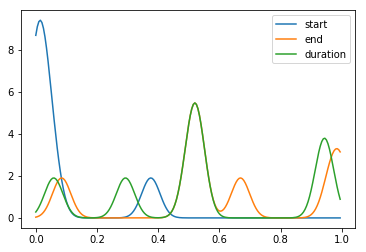

In [25]:
plt.plot(grid, np.exp(kde_geolife_starts.score_samples(grid)), label='start')
plt.plot(grid, np.exp(kde_geolife_ends.score_samples(grid)), label='end')
plt.plot(grid, np.exp(kde_geolife_durations.score_samples(grid)), label='duration')
plt.legend()
plt.show()

In [26]:
sekde_geolife = {'kde_start': kde_geolife_starts,
                 'kde_end': kde_geolife_ends,
                 'kde_duration': kde_geolife_durations}

In [27]:
pickle.dump(sekde_geolife, open('../data_geolife/sekde_geolife_cut_003.pkl', 'wb'))

## MDC

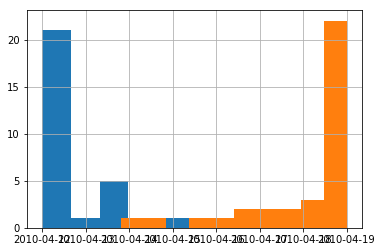

In [28]:
mdc['first'].hist()
mdc['last'].hist()

In [29]:
seconds_since = (mdc['first'] - mdc['first'].min()).dt.total_seconds()
seconds_until = (mdc['last'] - mdc['first'].min()).dt.total_seconds()

seconds_total = (mdc['last'].max() - mdc['first'].min()).total_seconds()

mdc['rel_start'] = seconds_since / seconds_total
mdc['rel_end'] = seconds_until / seconds_total

mdc['rel_duration'] = mdc['rel_end'] - mdc['rel_start']

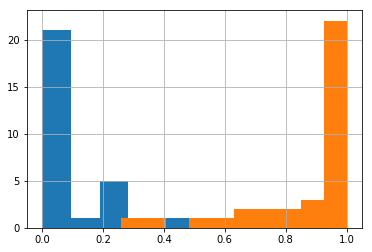

In [30]:
mdc['rel_start'].hist()
mdc['rel_end'].hist()

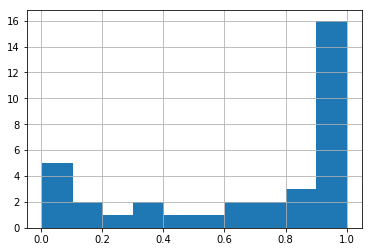

In [31]:
mdc['rel_duration'].hist()

In [32]:
kde_mdc_starts = KernelDensity(bandwidth=0.03)
kde_mdc_starts.fit(mdc['rel_start'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [33]:
kde_mdc_ends = KernelDensity(bandwidth=0.03)
kde_mdc_ends.fit(mdc['rel_end'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [34]:
kde_mdc_durations = KernelDensity(bandwidth=0.03)
kde_mdc_durations.fit(mdc['rel_duration'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

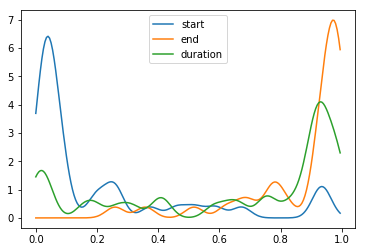

In [35]:
plt.plot(grid, np.exp(kde_mdc_starts.score_samples(grid)), label='start')
plt.plot(grid, np.exp(kde_mdc_ends.score_samples(grid)), label='end')
plt.plot(grid, np.exp(kde_mdc_durations.score_samples(grid)), label='duration')
plt.legend()
plt.show()

In [36]:
sekde_mdc = {'kde_start': kde_mdc_starts,
             'kde_end': kde_mdc_ends,
             'kde_duration': kde_mdc_durations}

In [37]:
pickle.dump(sekde_mdc, open('../data_mdc/sekde_mdc_cut_003.pkl', 'wb'))

## T-Drive

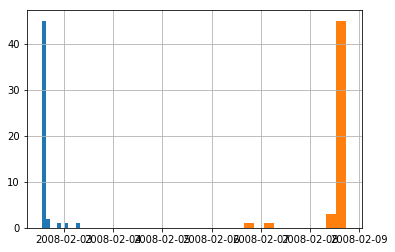

In [6]:
tdrive['first'].hist()
tdrive['last'].hist()

In [7]:
seconds_since = (tdrive['first'] - tdrive['first'].min()).dt.total_seconds()
seconds_until = (tdrive['last'] - tdrive['first'].min()).dt.total_seconds()

seconds_total = (tdrive['last'].max() - tdrive['first'].min()).total_seconds()

tdrive['rel_start'] = seconds_since / seconds_total
tdrive['rel_end'] = seconds_until / seconds_total

tdrive['rel_duration'] = tdrive['rel_end'] - tdrive['rel_start']

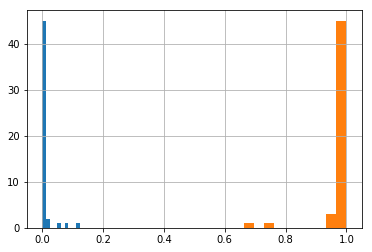

In [8]:
tdrive['rel_start'].hist()
tdrive['rel_end'].hist()

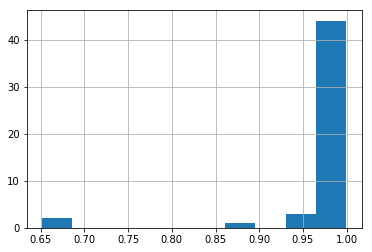

In [9]:
tdrive['rel_duration'].hist()

In [10]:
kde_tdrive_starts = KernelDensity(bandwidth=0.03)
kde_tdrive_starts.fit(tdrive['rel_start'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [11]:
kde_tdrive_ends = KernelDensity(bandwidth=0.03)
kde_tdrive_ends.fit(tdrive['rel_end'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [12]:
kde_tdrive_durations = KernelDensity(bandwidth=0.03)
kde_tdrive_durations.fit(tdrive['rel_duration'].values.reshape([-1, 1]))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.03, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

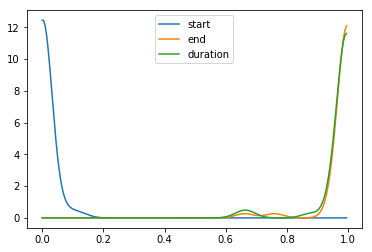

In [14]:
plt.plot(grid, np.exp(kde_tdrive_starts.score_samples(grid)), label='start')
plt.plot(grid, np.exp(kde_tdrive_ends.score_samples(grid)), label='end')
plt.plot(grid, np.exp(kde_tdrive_durations.score_samples(grid)), label='duration')
plt.legend()
plt.show()

In [15]:
sekde_tdrive = {'kde_start': kde_tdrive_starts,
                'kde_end': kde_tdrive_ends,
                'kde_duration': kde_tdrive_durations}

In [16]:
pickle.dump(sekde_tdrive, open('../data_t-drive/sekde_t-drive_cut_003.pkl', 'wb'))